# 참고
* [월간 데이콘 한국어 문장 관계 분류 경진대회](https://dacon.io/competitions/official/235875/overview/description)에 [공유된 코드](https://dacon.io/competitions/official/235875/codeshare/4520?page=1&dtype=recent)를 바탕으로 공부하였음.

# 환경설정


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/kimjuyeon/NLP 스터디/nlp-code-study/02_text_relation

/content/drive/Othercomputers/내 컴퓨터/kimjuyeon/NLP 스터디/nlp-code-study/02_text_relation


# EDA(Exploratory Data Analysis)

#Import Package
* 데이터를 확인을 위한 패키지 불러오기

In [3]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# load Data

In [4]:
PATH = '/content/drive/MyDrive/kimjuyeon/NLP 스터디/nlp-code-study/02_text_relation/data'

train_data = pd.read_csv(os.path.join(PATH, 'train_data.csv'), encoding='utf-8')
test_data = pd.read_csv(os.path.join(PATH, 'test_data.csv'), encoding='utf-8')

# Train, Test Data 확인

In [5]:
train_data.head(5)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [6]:
print(train_data.info(), end='\n\n')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1666 non-null   int64 
 1   premise     1666 non-null   object
 2   hypothesis  1666 non-null   object
 3   label       1666 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB
None


In [7]:
print("Train Columns :", train_data.columns)
print("Test COlumns :", test_data.columns)

Train Columns : Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')
Test COlumns : Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')


In [8]:
# value_counts -> 기본적으로 지정된 열의 각 값(value)에 대한 모든 발생 횟수를 반환
print("Train Label :", train_data['label'].value_counts(), sep='\n', end='\n\n')
print("Test Label :", test_data['label'].value_counts(), sep='\n')

Train Label :
entailment       8561
contradiction    8489
neutral          7948
Name: label, dtype: int64

Test Label :
answer    1666
Name: label, dtype: int64


In [9]:
# 결측치 확인
print("Train Null :", train_data.isnull().sum(), sep='\n', end='\n\n')
print("Test Null :", test_data.isnull().sum(), sep='\n')

Train Null :
index         0
premise       0
hypothesis    0
label         0
dtype: int64

Test Null :
index         0
premise       0
hypothesis    0
label         0
dtype: int64


# Label 분포 확인
* Train Dataset의 Label 분포를 Bar Chart를 사용화하여 시각화

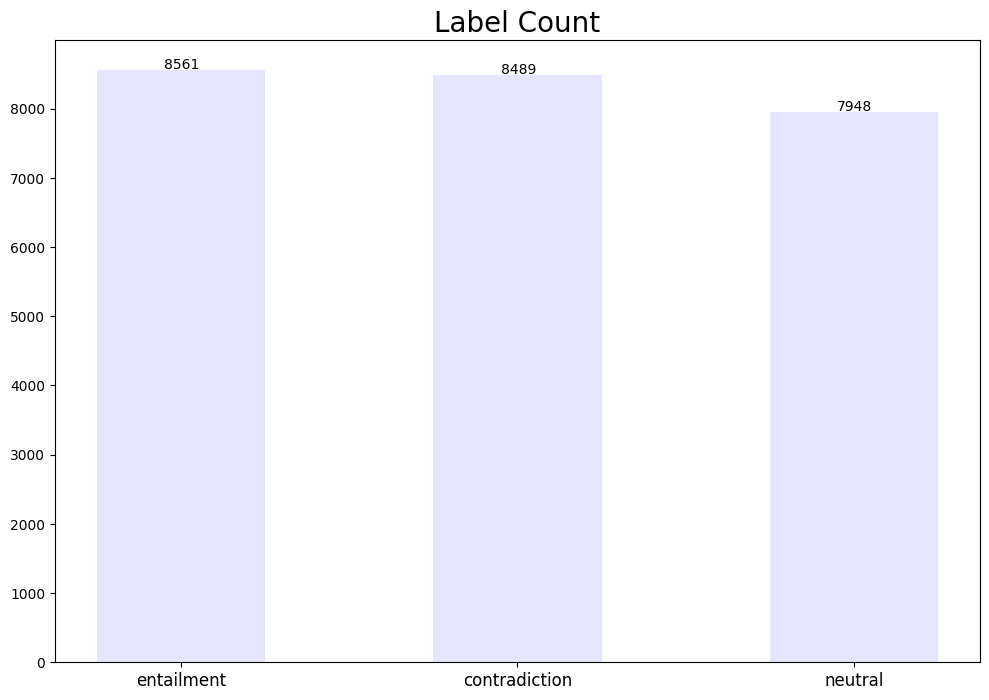

In [10]:
feature = train_data['label']

plt.figure(figsize=(10, 7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.1)
# width -> 막대 bar width
# color -> 막대 bar color
# alpha -> 막대 bar 투명도

plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
# 첫번쨰 인자 -> text x 좌표 개념
# 두번째 인자 -> text y 좌표 개념
# 세번째 인자 -> 출력할 text

plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.003, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# 전체, 가설 길이 확인
* Train에 존재하는 Premize(전제), Hypothesis(가설)의 길이를 확인하고 이를 통해 Tokenizer의 max_length 설정 가능

In [11]:
premise_max_len = np.max(train_data['premise'].str.len())
premise_min_len = np.min(train_data['premise'].str.len())
premise_mean_len = np.mean(train_data['premise'].str.len())

print("Max premise length:", premise_max_len)
print("Min premise length:", premise_min_len)
print("Mean premise length:", premise_mean_len)

Max premise length: 90
Min premise length: 19
Mean premise length: 45.406552524201935


In [12]:
hypothesis_max_len = np.max(train_data['hypothesis'].str.len())
hypothesis_min_len = np.min(train_data['hypothesis'].str.len())
hypothesis_mean_len = np.mean(train_data['hypothesis'].str.len())

print("Max hypothesis length:", hypothesis_max_len)
print("Min hypothesis length:", hypothesis_min_len)
print("Mean hypothesis length:", hypothesis_mean_len)

Max hypothesis length: 103
Min hypothesis length: 5
Mean hypothesis length: 24.924433954716378


* histogram으로 분포 확인

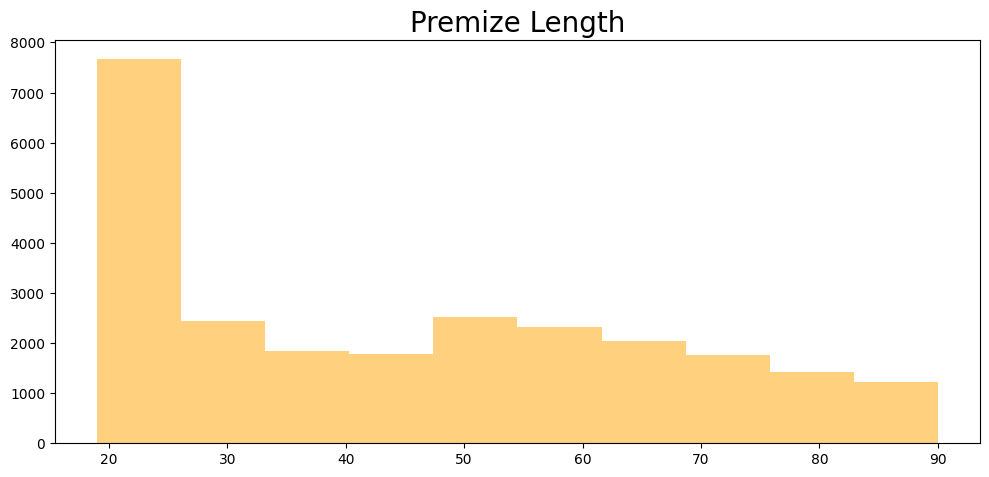

In [13]:
from collections import Counter

plt.figure(figsize=(10, 7.5))
plt.title('Premize Length', fontsize=20)

plt.hist(train_data['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.3, 1, 0.95]) # 레이아웃 설정

plt.show()

# 간단한 Text Preprocseeing
* 전체, 가설에 존재하는 한글 단어가 아닌 단어들은 전부 제거해준다

In [14]:
train_data['premise'] = train_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test_data['premise'] = test_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')

<ipython-input-14-509793e02d8c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['premise'] = train_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
<ipython-input-14-509793e02d8c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['premise'] = test_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')


In [15]:
train_data.head(5)

,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다.,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [16]:
train_data['hypothesis'] = train_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test_data['hypothesis'] = test_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')

<ipython-input-16-5ea796bc48c8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['hypothesis'] = train_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
<ipython-input-16-5ea796bc48c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['hypothesis'] = test_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')


In [17]:
train_data.head(5)

,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다,neutral


# Modeling
* transformer를 사용하기 위해서는 transformers 라이브러리를 설치해야함.


In [18]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.1 MB/s eta 0:00:00


* 모델링 작업을 하기 위한 라이브러리 호출

In [19]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

* seed 고정 및 gpu 설정

In [20]:
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Load Tokenizer, Model
* HuggingFaceHub에 존재하는 pretrained tokenizer와 model 및 model config를 불러온다.
* 이 때, Classification은 num_labels가 2로 Default 되어 있기 대문에 Model Config의 Parameter를 변경해준다. <- 이 부분을 어떻게 해야 하는지 자세히 확인할 것. (또한 이거를 어떻게 알았는지도)

* 참고하면 좋을 것 ([Huggingface transformer 설계구조 살펴보기](https://velog.io/@taekkim/Hugginface-transformer-%EC%84%A4%EA%B3%84%EA%B5%AC%EC%A1%B0-%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0))
  1. task를 정의하고 그에 맞게 dataset을 가공
  2. 적당한 model을 선택하고 모델을 만든다
  3. model에 데이터들을 태워서 학습을 시킨다.
  4. 3을 통해 나온 weight와 설정(config)들을 저장한다.
  5. 저장한 model의 checkpoint는 배포하거나, evaluatio을 할 때 사용한다.

### Model
* 기본적으로 `PretrainedModel` 클래스를 상속받고 있기 때문에 from_pretrained같은 함수를 BERT이건, GPT이건 사용할 수 있음.
* AutoModel
  * 모든 클래스에 걸쳐 Auto 클래스가 존재함.
  * 모델의 상세정보를 확인할 필요 없이 Model ID 만으로도 손쉽게 모델 구성이 가능

### Config
* 모델을 학습시키기 위한 요소들을 명시한 json 파일
* batch size, learning rate, weigth_decay 등 train에 필요한 요소들부터 tokenizer에 특수 토큰 (special token eg[mask] ) 들을 미리 설정하는 등 설정에 관한 전반적인 것들 명시
* PretrainedModel을 save_pretrained 메소드를 이용하면 모델의 체크포인트와 함께 저장되도록 되어있음.
* hugging face의 pretrained model을 그대로 사용하게 되면 자동으로 config파일이 로드되어 명시할 필요가 없지만, 설정을 변경하고 싶거나 나만의 모델을 학습시킬 때에는 config파일을 직접 불러와야 함.
* config 또한 model, tokenizer처럼 Model ID만 있으면, Config 클래스를 명확히 지정하거나 혹은 AutoConfig를 이용하는 방식으로 불러올 수 있음

In [21]:
MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'class

In [22]:
print(model)
print(config)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

# Tokenizing
* train data를 train과 validation dataset으로 나누고 각각 데이터를 tokenizer를 통해 tokenizing 한다.
* tokenizer에 들어가는 문장은 전제와 가설을 concat한 문장이 된다.

In [ ]:
# stratify -> 원본 데이터에서 label의 비율을 맞추어서 train test set으로 나누어주는 기능을 의미함.
train_dataset, valid_dataset = train_test_split(train_data, test_size=0.2, shuffle=True, stratify=train_data['label'])

tokenized_train = tokenizer(
    list(train_dataset['premize']),
    list(train_dataset['hypothesis']),
    
)